<a href="https://colab.research.google.com/github/giankev/wikidata_cultural_classifier/blob/main/notebooks/DNN_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
URL_FILE_1 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/dataset_parser.py"
URL_FILE_2 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/wiki_extractor.py"
URL_FILE_3 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/custom_dataset.py"

print("Scaricando il file 1...")
!wget {URL_FILE_1}

print("\nScaricando il file 2...")
!wget {URL_FILE_2}

print("\nScaricando il file 3...")
!wget {URL_FILE_3}

print("\nDownload completati. Contenuto della directory corrente:")

Scaricando il file 1...
--2025-04-26 11:08:17--  https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/dataset_parser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5912 (5.8K) [text/plain]
Saving to: ‘dataset_parser.py’

dataset_parser.py   100%[===================>]   5.77K  --.-KB/s    in 0s      

2025-04-26 11:08:17 (53.5 MB/s) - ‘dataset_parser.py’ saved [5912/5912]


Scaricando il file 2...
--2025-04-26 11:08:17--  https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/wiki_extractor.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.11

In [2]:
!pip install wikidata

In [3]:
from custom_dataset import CustomData
import pandas as pd
import numpy as np

In [4]:
try:
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('valid.csv') #per ora uso valid per il testing, in attesa del test.csv..
    print("File train.csv e validation.csv caricati.")
except Exception as e:
    print(f"Errore: {e}")
    print("Impossibile procedere senza i file CSV.")
    exit()

dataset_custom = CustomData(df_train)
df_train = dataset_custom.add_feature()

File train.csv e validation.csv caricati.
Adding feature...
WARN: Failed to create extractor for index 5245 (ID/URL: http://www.wikidata.org/entity/Q7551241): Errore nel recupero dell'entità Q7551241: HTTP Error 404: Not Found

Fetch Summary:
  Attempted: 6251
  Successful Fetches (Extractor created): 6250
  Failed Fetches (Extractor is None): 1


In [5]:
dataset_custom2 = CustomData(df_test)
df_test = dataset_custom2.add_feature()

Adding feature...

Fetch Summary:
  Attempted: 300
  Successful Fetches (Extractor created): 300
  Failed Fetches (Extractor is None): 0


In [6]:
print("\n=== Processing Training Data ===")
df_train_processed = dataset_custom.preprocess_data(df_train)

print("\n=== Processing Validation Data ===")
df_validation_processed = dataset_custom2.preprocess_data(df_test)


=== Processing Training Data ===

--- Preprocessing DataFrame (Initial rows: 6251) ---
Handling Missing Values: Eliminato 2 righe con valori NaN.
  Righe rimanenti dopo dropna: 6249
--- Preprocessing Completo (Final rows: 6249, Final columns: 23) ---

=== Processing Validation Data ===

--- Preprocessing DataFrame (Initial rows: 300) ---
Handling Missing Values: Nessuna riga con NaN trovata.
--- Preprocessing Completo (Final rows: 300, Final columns: 23) ---


In [7]:
X_train = df_train_processed.drop(columns=["label"])
y_train = df_train_processed["label"]

X_val = df_validation_processed.drop(columns=['label'])
y_val = df_validation_processed['label']

print("Shape prima dello scaling:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val:   {X_val.shape}")

Shape prima dello scaling:
  X_train: (6249, 22)
  X_val:   (300, 22)


In [8]:
print("\n--- Ispezione Valori Unici in y ---")
print("Valori unici in y_train:", y_train.unique())
print("Conteggio valori in y_train:\n", y_train.value_counts())

print("\nValori unici in y_val:", y_val.unique())
print("Conteggio valori in y_val:\n", y_val.value_counts())
print("-" * 30)


--- Ispezione Valori Unici in y ---
Valori unici in y_train: ['cultural exclusive' 'cultural representative' 'cultural agnostic']
Conteggio valori in y_train:
 label
cultural exclusive         2690
cultural agnostic          1871
cultural representative    1688
Name: count, dtype: int64

Valori unici in y_val: ['cultural representative' 'cultural exclusive' 'cultural agnostic']
Conteggio valori in y_val:
 label
cultural agnostic          117
cultural representative    107
cultural exclusive          76
Name: count, dtype: int64
------------------------------


In [9]:
label_mapping = {
    'cultural agnostic': 0,
    'cultural representative': 1,
    'cultural exclusive': 2
}

# Applica a y_train e y_val
y_train = y_train.map(label_mapping)
y_val= y_val.map(label_mapping)

In [10]:
print("\n--- Ispezione Valori Unici in y ---")
print("Valori unici in y_train:", y_train.unique())
print("Conteggio valori in y_train:\n", y_train.value_counts())

print("\nValori unici in y_val:", y_val.unique())
print("Conteggio valori in y_val:\n", y_val.value_counts())
print("-" * 30)


--- Ispezione Valori Unici in y ---
Valori unici in y_train: [2 1 0]
Conteggio valori in y_train:
 label
2    2690
0    1871
1    1688
Name: count, dtype: int64

Valori unici in y_val: [1 2 0]
Conteggio valori in y_val:
 label
0    117
1    107
2     76
Name: count, dtype: int64
------------------------------


--- Preparazione Dati per PyTorch ---
ERRORE: La variabile 'X_train_scaled' non è definita!
ERRORE: La variabile 'X_train_scaled' non è un DataFrame/Serie Pandas!
ERRORE: La variabile 'X_val_scaled' non è definita!
ERRORE: La variabile 'X_val_scaled' non è un DataFrame/Serie Pandas!
Numero di classi rilevate in y_train: 3
Tensor shapes: X_train torch.Size([6249, 22]), y_train torch.Size([6249]), X_val torch.Size([300, 22]), y_val torch.Size([300])
Tensor dtypes: X_train torch.float32, y_train torch.int64, X_val torch.float32, y_val torch.int64
Dati pronti. Batch size: 64. Train batches: 98, Val batches: 5

--- Struttura del Modello PyTorch (Più Profondo) ---
DeeperClassifier(
  (layer_stack): Sequential(
    (0): Linear(in_features=22, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
  

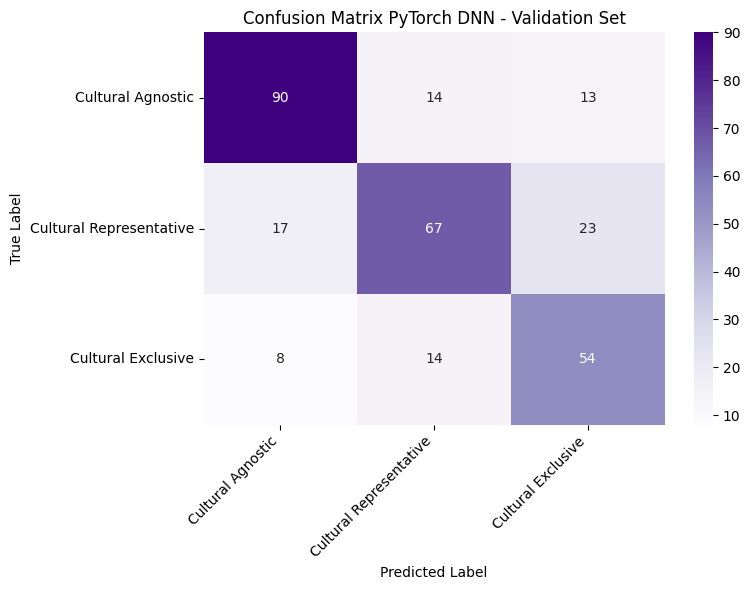

------------------------------
Valutazione e plotting completati.


In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# Assumiamo che le metriche e le librerie di plotting siano importate
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
import time

# --- Fine Esempio Dati ---

print("--- Preparazione Dati per PyTorch ---")

# Verifica Esistenza Variabili (importante!)
required_vars = ['X_train_scaled', 'y_train', 'X_val_scaled', 'y_val']
for var_name in required_vars:
    if var_name not in locals() and var_name not in globals():
         print(f"ERRORE: La variabile '{var_name}' non è definita!")
         exit()
    if not isinstance(locals().get(var_name, globals().get(var_name)), (pd.DataFrame, pd.Series)):
         print(f"ERRORE: La variabile '{var_name}' non è un DataFrame/Serie Pandas!")
         exit()


# Determina il numero di classi da y_train
try:
    n_classes = y_train.nunique()
    print(f"Numero di classi rilevate in y_train: {n_classes}")
    if n_classes <= 1: raise ValueError("Trovata solo una o zero classi nel target.")
except Exception as e:
    print(f"Errore nel determinare n_classes da y_train: {e}"); exit()

# Converti DataFrame/Series Pandas in array NumPy e poi in Tensori PyTorch
try:
    X_train_np = X_train.values.astype(np.float32)
    y_train_np = y_train.values.astype(np.int64) # int64 -> torch.long
    X_val_np = X_val.values.astype(np.float32)
    y_val_np = y_val.values.astype(np.int64) # int64 -> torch.long
except Exception as e:
     print(f"Errore durante la conversione in NumPy: {e}"); exit()


X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.long)

print(f"Tensor shapes: X_train {X_train_tensor.shape}, y_train {y_train_tensor.shape}, X_val {X_val_tensor.shape}, y_val {y_val_tensor.shape}")
print(f"Tensor dtypes: X_train {X_train_tensor.dtype}, y_train {y_train_tensor.dtype}, X_val {X_val_tensor.dtype}, y_val {y_val_tensor.dtype}")

# --- 1. Creare PyTorch Dataset e DataLoader (come prima) ---
class TabularDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    def __len__(self): return len(self.features)
    def __getitem__(self, idx): return self.features[idx], self.labels[idx]

train_dataset = TabularDataset(X_train_tensor, y_train_tensor)
val_dataset = TabularDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Dati pronti. Batch size: {batch_size}. Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

# --- 2. Definire il Modello della Rete Neurale (Versione più Profonda) ---

class DeeperClassifier(nn.Module):
    def __init__(self, num_features, num_classes,
                 h1=256, h2=128, h3=64, h4=32, # Unità per layer (esempio)
                 drop1=0.4, drop2=0.3, drop3=0.2): # Tassi di Dropout
        super().__init__()
        self.layer_stack = nn.Sequential(
            # Layer 1
            nn.Linear(num_features, h1),
            nn.ReLU(),
            nn.BatchNorm1d(h1), # Aggiunta Batch Normalization (spesso utile in reti più profonde)
            nn.Dropout(drop1),

            # Layer 2
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.BatchNorm1d(h2),
            nn.Dropout(drop2),

            # Layer 3 (Aggiunto)
            nn.Linear(h2, h3),
            nn.ReLU(),
            nn.BatchNorm1d(h3),
            nn.Dropout(drop3),

            # Layer 4 (Aggiunto - opzionale, puoi fermarti a 3)
            # nn.Linear(h3, h4),
            # nn.ReLU(),
            # nn.BatchNorm1d(h4),
            # nn.Dropout(drop3 * 0.5), # Riduci ulteriormente dropout

            # Layer di Output
            # L'input a questo layer deve corrispondere all'output dell'ultimo layer nascosto attivo
            nn.Linear(h3, num_classes) # Se ti fermi a 3 layer nascosti (h3)
        )

    def forward(self, x):
        logits = self.layer_stack(x)
        return logits

# Crea un'istanza del nuovo modello
input_features = X_train_tensor.shape[1]
output_classes = n_classes
# Usa la nuova classe del modello
model = DeeperClassifier(num_features=input_features, num_classes=output_classes) # Passa i parametri desiderati
print("\n--- Struttura del Modello PyTorch (Più Profondo) ---")
print(model)

# --- 3. Definire Loss e Ottimizzatore (come prima) ---
# --- 3. Definire Funzione di Costo (Loss) e Ottimizzatore (con Modifiche) ---
criterion = nn.CrossEntropyLoss()

# Prova un learning rate leggermente più basso e aggiungi weight_decay
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5) # lr ridotto, aggiunto weight_decay
# optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.01) # Alternativa con AdamW

# --- 4. Ciclo di Addestramento (con Modifiche) ---
print("\n--- Inizio Addestramento (Rete Più Profonda) ---")
# Aumenta le epoche, ma affidati anche a Early Stopping (se lo implementi)
num_epochs = 50 # Aumentato da 25 (DA TUNARE!)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Addestramento su dispositivo: {device}")

# (Le liste per loss/accuracy rimangono uguali)
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
start_train_time = time.time()

# --- Implementazione Early Stopping Migliore (Opzionale ma Raccomandato) ---
patience = 15  # Quante epoche aspettare senza miglioramenti della val_loss
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_state = None # Per salvare i pesi del modello migliore

print(f"Early Stopping attivato con patience={patience}")
# ---------------------------------------------------------------------


for epoch in range(num_epochs):
    # --- Fase di Training (Codice invariato) ---
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # --- Fase di Validazione (Codice invariato per calcolo loss/acc) ---
    model.eval()
    running_val_loss, correct_val, total_val = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_acc = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f'Epoca [{epoch+1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
          f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')


    # --- Logica Early Stopping ---
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        # Salva lo stato del modello corrente come il migliore finora
        best_model_state = model.state_dict()
        print(f"  Nuova miglior val_loss: {best_val_loss:.4f}. Salvataggio modello...")
    else:
        epochs_no_improve += 1
        print(f"  Val_loss non migliorata per {epochs_no_improve} epoche.")

    if epochs_no_improve >= patience:
        print(f"\nEarly stopping attivato all'epoca {epoch+1} dopo {patience} epoche senza miglioramenti.")
        break # Interrompi il ciclo di addestramento
    # ---------------------------

# --- Fine Ciclo Addestramento ---

end_train_time = time.time()
print(f"\nAddestramento interrotto/completato in {(end_train_time - start_train_time):.2f} secondi.")

# --- Carica i pesi del modello migliore trovato da Early Stopping ---
if best_model_state is not None:
    print("Caricamento dei pesi del modello con la migliore validation loss...")
    model.load_state_dict(best_model_state)
else:
     print("Attenzione: Early stopping non attivato o nessun modello salvato. Si usa l'ultimo modello.")
# --- 5. Valutazione Finale e Metriche (come prima) ---
print("--- Valutazione Finale su Validation Set ---")

# Raccogli predizioni e label vere
all_val_preds = []
all_val_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        # labels non serve spostarle qui, tanto le convertiamo dopo
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_val_preds.extend(predicted.cpu().numpy())
        all_val_labels.extend(labels.numpy()) # Prende le labels originali dal loader

y_pred_val_nn = np.array(all_val_preds)
y_val_true = np.array(all_val_labels) # Label vere numeriche (0, 1, 2...)

# Calcola metriche
accuracy_nn = accuracy_score(y_val_true, y_pred_val_nn)
average_strategy = 'macro'
precision_nn = precision_score(y_val_true, y_pred_val_nn, average=average_strategy, zero_division=0)
recall_nn = recall_score(y_val_true, y_pred_val_nn, average=average_strategy, zero_division=0)
f1_nn = f1_score(y_val_true, y_pred_val_nn, average=average_strategy, zero_division=0)

print("\nMetriche PyTorch DNN sul Validation Set:")
print(f"  Accuracy:        {accuracy_nn:.4f}")
print(f"  Precision ({average_strategy}): {precision_nn:.4f}")
print(f"  Recall ({average_strategy}):    {recall_nn:.4f}")
print(f"  F1-Score ({average_strategy}): {f1_nn:.4f}")
print("\nConfusion Matrix PyTorch DNN:")
class_names = ['Cultural Agnostic', 'Cultural Representative', 'Cultural Exclusive']
cm_nn = confusion_matrix(y_val_true, y_pred_val_nn)
plt.figure(figsize=(8, 6))
plot_labels = class_names if class_names is not None else 'auto'
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples',
            xticklabels=plot_labels, yticklabels=plot_labels)
plt.title('Confusion Matrix PyTorch DNN - Validation Set')
plt.ylabel('True Label'); plt.xlabel('Predicted Label')
if class_names: plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

print("-" * 30)
print("Valutazione e plotting completati.")